# PCA Plots

## General settings and loading files

In [1]:
%%time

% matplotlib inline
% load_ext autoreload
% autoreload 2

% run general_settings.py
# ^ Takes ~20s to run if it finds the dumpfiles
# ^ WARNING: It will hog ~2.02 Gb RAM


[11:07:18] 'panels' dict
[11:07:18] 'galanter', 'present', 'missing' dataframes
[11:07:18] 'panel_labels'
[11:07:18] 'panel_names' dict
[11:07:18] 'panel_rsIDs' dict
[11:07:18] 'genome' dataframe
[11:07:24] 'lat' dataframe
[11:07:37] 'control_genotypes' huge datagrame
[11:07:37] 'control_rsIDs' dict to filter it ^
[11:07:37] 'cp_factors' list
[11:07:37] 'control_names' dict
[11:07:37] 'df_1000G_samples'
[11:07:37] 'df_1000G_SNPs'
[11:07:37] 'df_1000G_genotypes'
[11:07:37] 'df_1000G_populations'
[11:07:37] 'df_1000G_genotypes_alleles'

/home/juan/repos/tesina/settings/genome.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  centromers["chromosome"] = [i.replace("CEN", "") for i in centromers.index]
/home/juan/anaconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1572: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())



[11:07:37] 'mafs' dataframe
CPU times: user 16.4 s, sys: 3.08 s, total: 19.4 s
Wall time: 19.5 s


/home/juan/anaconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1574: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


## Create the datasets
Lists of sample IDs of chosen populations to later filter 1000 Genomes data.

In [5]:
% run datasets_settings.py

! echo; wc -l /home/juan/tesina/dataset_dumps/*.samples | grep -v total

[11:08:42] 'dataset_names'
[11:08:42] 'dataset_populations'
[11:08:42] 'dataset_samples' created and written to files

  346 /home/juan/tesina/dataset_dumps/L.samples
  544 /home/juan/tesina/dataset_dumps/LE.samples
  751 /home/juan/tesina/dataset_dumps/LEA.samples
  959 /home/juan/tesina/dataset_dumps/LEAC.samples
 1062 /home/juan/tesina/dataset_dumps/LEACI.samples


In [6]:
for label, ary in dataset_samples.items():
    print(len(ary), dataset_names[label])

347 Latinos
545 Latinos, Europeos
752 Latinos, Europeos, Africanos
960 Latinos, Europeos, Africanos, Chinos
1063 Latinos, Europeos, Africanos, Chinos, Indios


## PCA plots

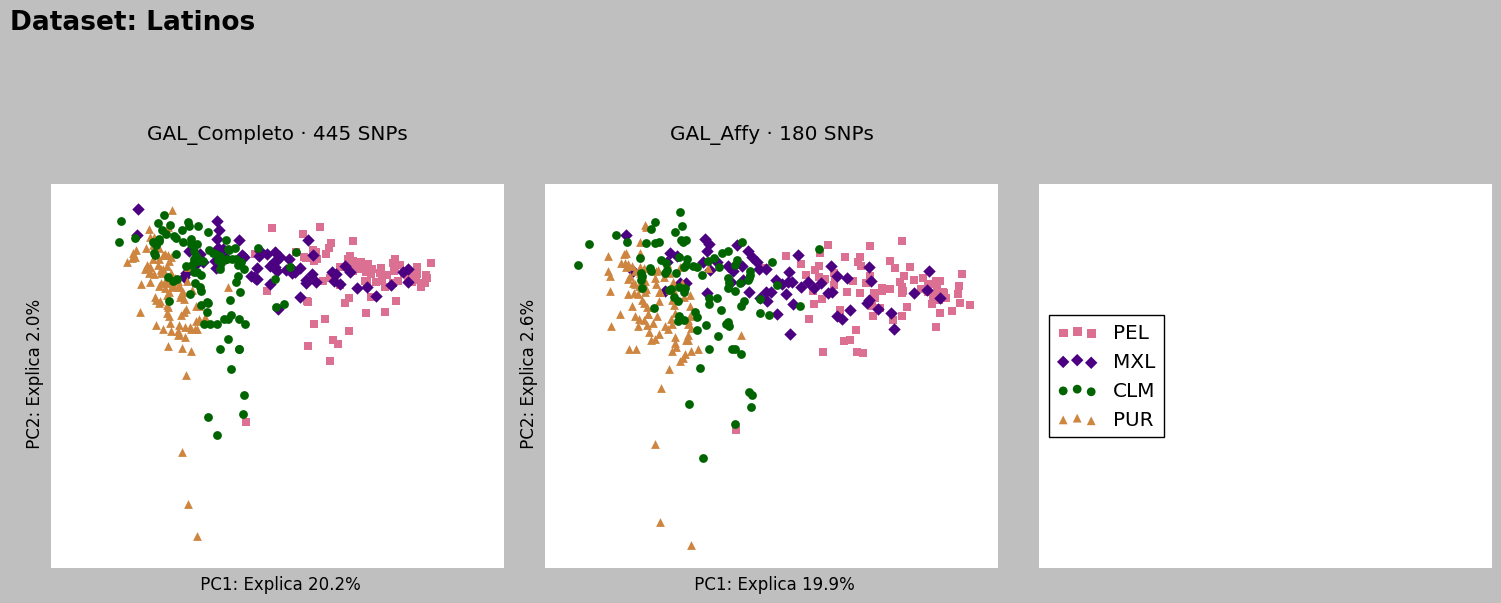

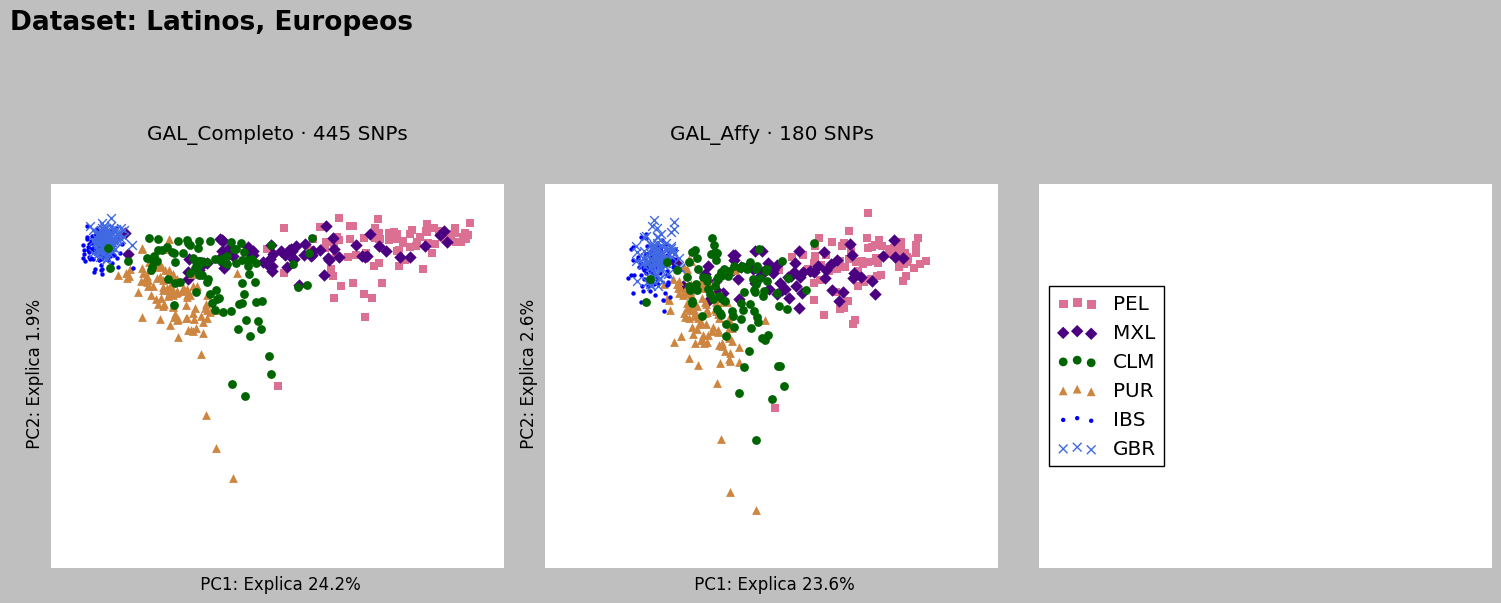

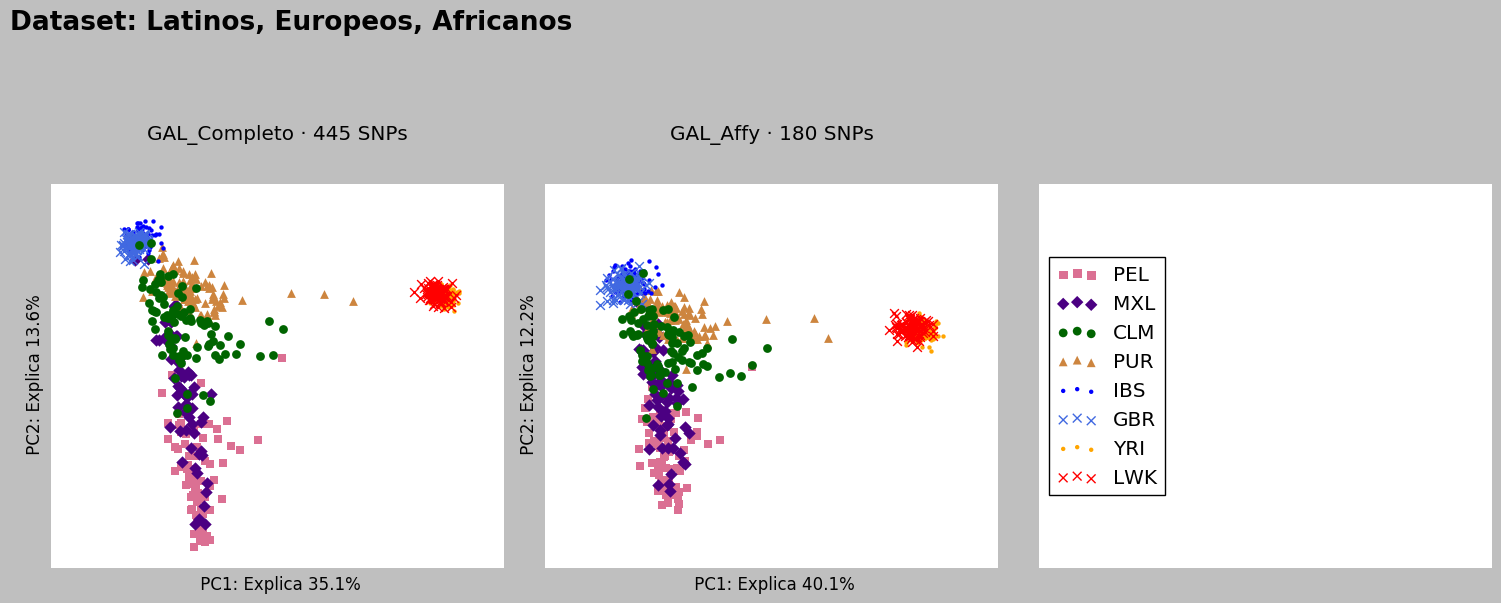

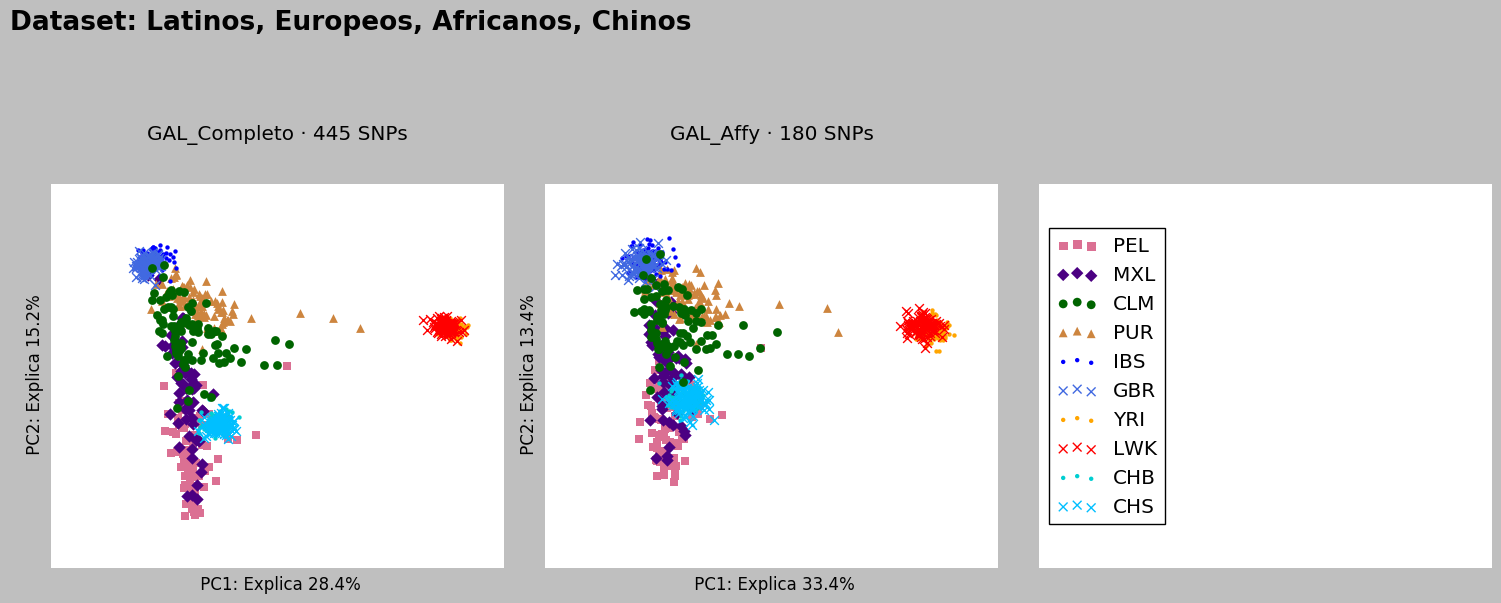

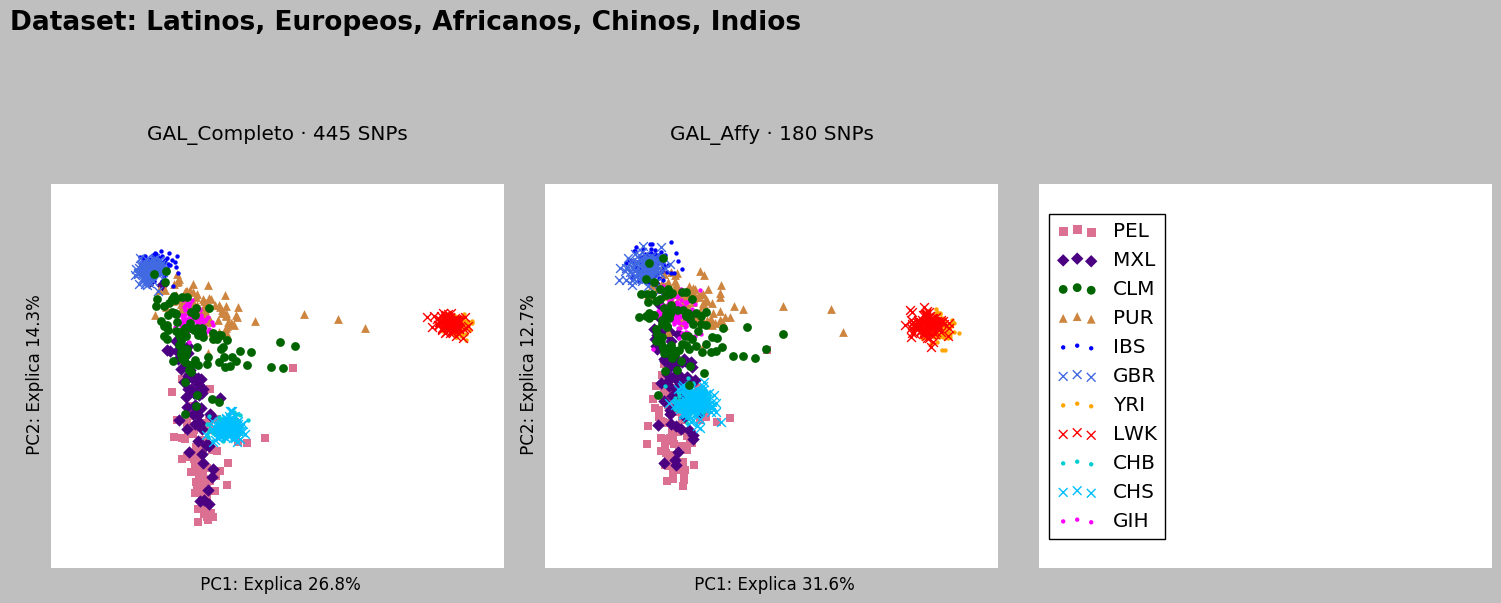

In [19]:
# %%time

# == WARNING ==
# This cell will take ~4m to execute

from plotters.pca import PCAPlotter

pca_plotter = PCAPlotter()
components_to_compare = [("PC1", "PC2")]

def make_filename(dataset_label, panel_labels, components_to_compare):
    return "{}_{}_{}".format(dataset_label, "_".join(panel_labels).lower(),
                             len(components_to_compare) * 2)

for dataset_label, sample_ids in dataset_samples.items():
    
    fig_title = "Dataset: {}".format(dataset_names[dataset_label])
    
    # GAL Panles
    dataset_genotypes = df_1000G_genotypes.loc[sample_ids, :]
    filename = make_filename(dataset_label, panel_labels, components_to_compare)
    populations_to_plot = dataset_populations[dataset_label]  # Order to the plot!
    pca_plotter.plot(fig_title, panel_rsIDs, dataset_genotypes, df_1000G_samples,
                     components_to_compare, panel_names, filename,
                     populations_to_plot)
    
#     # Control Panels
#     dataset_genotypes = control_genotypes.loc[sample_ids, :]
#     filename = make_filename(dataset_label, control_labels, components_to_compare)
#     populations_to_plot = dataset_populations[dataset_labels]  # Order to the plot!
#     pca_plotter.plot(fig_title, control_rsIDs, dataset_genotypes, df_1000G_samples,
#                      components_to_compare, control_names, filename,
#                      populations_to_plot)
    
#     # Control Panels - Extra components
#     only_big_cp = {"100": control_rsIDs["100"]}
#     more_components_to_compare = [("PC3", "PC4"), ("PC5", "PC6"),
#                                   ("PC7", "PC8")]
#     dataset_genotypes = control_genotypes.loc[sample_ids, :]
#     populations_to_plot = dataset_populations[dataset_labels]  # Order to the plot!
#     filename = make_filename(dataset_label, ["100"], more_components_to_compare)
#     pca_plotter.plot(fig_title, only_big_cp, dataset_genotypes, df_1000G_samples,
#                      more_components_to_compare, control_names, filename,
#                      populations_to_plot)

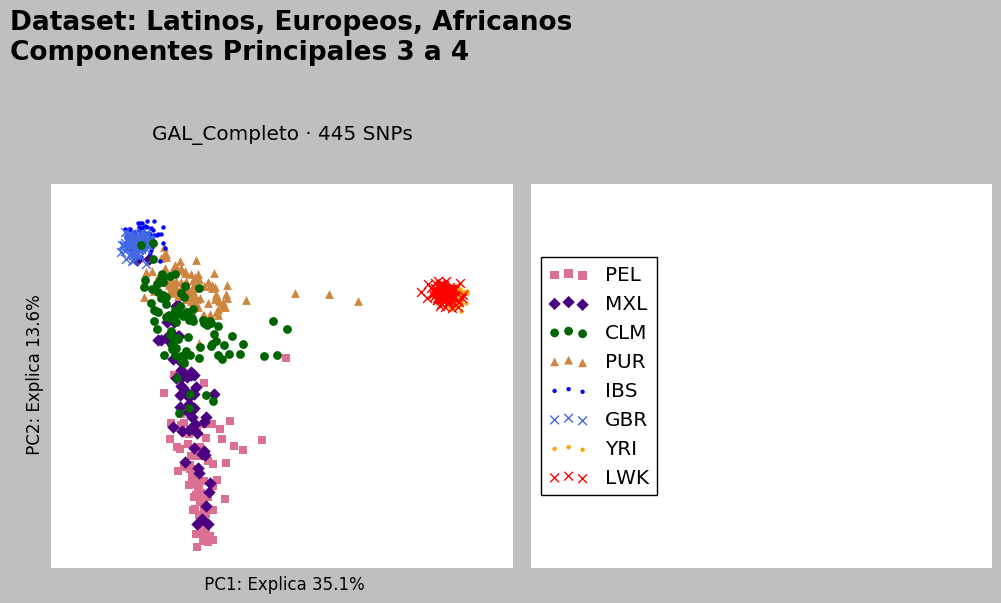

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from os.path import join, expanduser
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from pandas import DataFrame, Series
from helpers import plot_helpers
FIGS_DIR = expanduser("~/tesina/charts/PCAs")

debug = {}

for dataset_label, sample_ids in dataset_samples.items():
    
    if dataset_label != "LEA":
        continue
    
    figtitle = "Dataset: {}".format(dataset_names[dataset_label])
    
    # GAL Panles
    dataset_genotypes = df_1000G_genotypes.loc[sample_ids, :]
    filename = make_filename(dataset_label, panel_labels, components_to_compare)
    rsIDs_per_panel = panel_rsIDs
    samples = df_1000G_samples
    components_to_compare = [("PC1", "PC2")]

    # Set figure and plots dimensions
    plot_width = 5
    plot_height = 5

    if components_to_compare == [(0, 1)]:
        n_cols = len(rsIDs_per_panel)
    else:
        # I only plot extra components for one panel in a different figure,
        # so I only need the extra columns in that case, where the amount
        # of panels is not equal to the number of columns.
        n_cols = len(components_to_compare)
        # The first two components are ploted elsewhere
        # So in this figure, we're plotting from PC2 + 1, two per col:
        figtitle += "\nComponentes Principales 3 a {}".format(2 + 2*n_cols)

    n_cols += 1  # Extra column for the legend in an empty axes
    n_rows = 1
    fig_width = plot_width * n_cols
    fig_height = plot_height * n_rows

    fig = plt.figure(figsize=(fig_width, fig_height))
    axes = list(np.arange(n_cols * n_rows) + 1)
    axes.reverse()

    pcas = []

    for ix, (panel_label, panel) in enumerate(rsIDs_per_panel.items()):
        if panel_label == "GAL_Affy":  ####
            continue

        dataset = dataset_genotypes.loc[:, panel].dropna(axis=1)
        genotypes_matrix = dataset.values
        pop_labels = samples.loc[dataset.index]["population"]
        pca = PCA()
        pcas.append(pca)

        # This step creates a new dataframe, which will take RAM as the df
        # of genotypes that it uses as input.
        pca_df = DataFrame(pca.fit_transform(genotypes_matrix), index=dataset.index)
        pca_df.columns = ["PC{}".format(ix + 1) for ix in pca_df.columns]
        pca_df = df_1000G_samples.join(pca_df).dropna()
        debug["pca_df"] = pca_df

        # Maybe this will help the RAM use:
        del(dataset, genotypes_matrix)

        explained = {}
        for ix, ratio in enumerate(pca.explained_variance_ratio_):
            pc_label = "PC{}".format(ix + 1)
            explained[pc_label] = str(round(ratio * 100, 1)) + "%"

        for components in components_to_compare:
            ax_id = axes.pop()
            ax = fig.add_subplot(n_rows, n_cols, ax_id)
            ax.set_title(panel_names[panel_label], y=1.1)

            # dataset_populations is an ORDERED dict, I want that order in the labels
            for pop_label in dataset_populations[dataset_label]:

                marker = plot_helpers.population_markers(pop_label)
                color = plot_helpers.population_colors(pop_label)

                filled_markers = ['o', '.', 'D', 's', '^', '<', '>', '*']
                lw = 0 if marker in filled_markers else 1  # linewidth
                z = 1 if marker == 'o' else 0  # americans are 'o' and appear on top

                population_mask = pca_df["population"] == pop_label
                s = ax.scatter(components[0], components[1],
                               data=pca_df[population_mask],
                               lw=lw, label=pop_label, marker=marker,
                               c=color, zorder=z, s=40)
                ax.tick_params(axis="x", which="both", bottom="off",
                               top="off", labelbottom="off")
                ax.tick_params(axis="y", which="both", left="off",
                               right="off", labelleft="off")
                for spine in ax.spines.values():
                    spine.set_edgecolor("silver")

                handles, labels = ax.get_legend_handles_labels()

            ylabel_prefix = ""
            xlabel_prefix = ""

            ax.set_xlabel("{} {}: Explica {}".format(xlabel_prefix,
                                                     components[0],
                                                     explained[components[0]]))
            ax.set_ylabel("{} {}: Explica {}".format(ylabel_prefix,
                                                     components[1],
                                                     explained[components[1]]))

            #  ax.axvline(0, linestyle="dotted", color="grey")
            #  ax.axhline(0, linestyle="dotted", color="grey")
            plot_helpers.hide_spines_and_ticks(ax, spines="all")

    # Legend axes
    ax = fig.add_subplot(n_rows, n_cols, axes.pop())
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    for loc in ['top', 'bottom', 'left', 'right']:
        ax.spines[loc].set_visible(False)
    ax.legend(handles, labels, loc="center left", ncol=1)

    plt.tight_layout()
    fig.suptitle(figtitle, fontsize=19, fontweight="bold",
                 position=(0, 1.2), ha="left")
    plt.subplots_adjust(top=0.85)

    plt.savefig(join(FIGS_DIR, filename), facecolor="w")
    plt.show()

